In [1]:
#Dataset 1
!git clone https://github.com/mahedishato/Bangla-Sentiment-Analysis.git

Cloning into 'Bangla-Sentiment-Analysis'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (21/21), 3.15 MiB | 4.29 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [108]:
#Dataset 2
!git clone https://github.com/mohsinulkabir14/BanglaBook.git

fatal: destination path 'BanglaBook' already exists and is not an empty directory.


In [109]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns, re
from sklearn.model_selection import train_test_split
import keras

In [110]:
from keras.preprocessing.text import Tokenizer

In [111]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [112]:
df = pd.read_csv('/content/BanglaBook/data/csv/train.csv')
display(df)

,id,Book_Name,Writer_Name,Category,Rating,Review,Site,sentiment,label
0,19635,নেভার স্টপ লার্নিং (হার্ডকভার),আয়মান সাদিক,ছাত্রজীবন উন্নয়ন,5,মোটিভেশনাল ভিডিও দেখা শুরু হয়েছে ভাইয়ার ভিডিও ...,Rokomari,positive,2
1,31528,রাসুলুল্লাহ (স) এর নামায (১ম ও ২য় খণ্ড একত্রে...,আল্লামা মুহাম্মদ নাসীরুদ্দীন আলবানী (রহঃ),সালাত/নামায,1,"আসসালামু আলাইকুম।ভাইয়েরা, বইটা নিঃসন্দেহে অবশ্...",Rokomari,negative,0
2,9235,পোয়েটিক জাস্টিস (পেপারব্যাক),আগাথা ক্রিস্টি,"রহস্য, গোয়েন্দা, ভৌতিক, মিথ, থ্রিলার, ও অ্যাড...",5,"আগাথা ক্রিস্টির বিখ্যাত ক্রাইম নোভেল ""দ্য মার...",Rokomari,positive,2
3,89993,কমপ্লিট এডোবি ফটোশপ (সিডি সহ) (পেপারব্যাক),বাপ্পি আশরাফ,গ্রাফিক্স ডিজাইন ও মাল্টিমিডিয়া,5,দুর্দান্ত,Rokomari,positive,2
4,155762,মাগফিরাতের পথ ও পাথেয়,ইমাম ইবনু রজব হাম্বলি (রহঃ),আত্মশুদ্ধি ও অনুপ্রেরণা,5,বইঃ মাগফিরাতের পথ ও পাথেয়\nলেখক : ইমাম ইবনু রজ...,WafiLife,positive,2
...,...,...,...,...,...,...,...,...,...
110640,131529,হুমায়ূন আহমেদ : সাহিত্যের জীবন্ত পাঠশালা (হার...,শামীম আহমেদ ১ (সম্পাদক),সাহিত্য ও সাহিত্যিক,5,একটি গন্থ- এ যেন লেখকের নিজের লেখা 'সাহিত্যজীব...,Rokomari,positive,2
110641,155466,কিংবদন্তির কথা বলছি,আহমাদ সাব্বির,ইসলামী ব্যক্তিত্ব,5,ছোটবেলায় আমার আম্মাকে দেখতাম ‘মাসিক মদিনা’ পড়ত...,WafiLife,positive,2
110642,96094,আহকামে যিন্দেগী (পঞ্চম সংস্করণ) (হার্ডকভার),মাওলানা মুহাম্মদ হেমায়েত উদ্দীন,ইসলামি বিধি-বিধান ও মাসআলা-মাসায়েল,5,"বই তা অনেক ভালো,, আমল এর জন্য অনেক ভালো একটা বই",Rokomari,positive,2
110643,11430,কাস্টমার সার্ভিস ১.০ (হার্ডকভার),আনোয়ার এমডি হোসেইন,ক্যারিয়ার উন্নয়ন,5,বাংলাভাষায় কাস্টমার সার্ভিসের উপর খুব বেশি বই...,Rokomari,positive,2


In [113]:
df.shape

(110645, 9)

In [114]:
# Display general information about the DataFrame
print("DataFrame Information:")
print(df.info())

# Display the number of rows and columns in the DataFrame
print("\nDataFrame Shape:")
print(df.shape)

# Display the total number of elements in the DataFrame
print("\nDataFrame Size:")
print(df.size)

# Display descriptive statistics of the DataFrame
print("\nDataFrame Descriptive Statistics:")
print(df.describe())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Display the last few rows of the DataFrame
print("\nLast few rows of the DataFrame:")
print(df.tail())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110645 entries, 0 to 110644
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           110645 non-null  int64 
 1   Book_Name    110645 non-null  object
 2   Writer_Name  110456 non-null  object
 3   Category     110615 non-null  object
 4   Rating       110645 non-null  int64 
 5   Review       110645 non-null  object
 6   Site         110645 non-null  object
 7   sentiment    110645 non-null  object
 8   label        110645 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 7.6+ MB
None

DataFrame Shape:
(110645, 9)

DataFrame Size:
995805

DataFrame Descriptive Statistics:
                  id         Rating          label
count  110645.000000  110645.000000  110645.000000
mean    78939.435085       4.574902       1.834543
std     45620.275616       0.980055       0.510385
min         1.000000       1.000000       0.000000
25%   

In [115]:
df['label'].value_counts()

2    99110
0     6772
1     4763
Name: label, dtype: int64

In [116]:
df.reset_index(drop=True, inplace=True)
df['Review'] = df.Review.apply(lambda x: preprocessing(str(x)))

In [146]:
"""
train1, test1 = train_test_split(df,random_state=69, test_size=0.2)
"""

training_sentences = []
testing_sentences = []

train_sentences=df['Review'].values
train_labels=df['label'].values

for i in range(train_sentences.shape[0]):
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)

training_sentences=np.array(training_sentences)

In [147]:
val_df = pd.read_csv('/content/BanglaBook/data/csv/validation.csv')

In [148]:
test_sentences=val_df['Review'].values
test_labels=val_df['label'].values
"""
for i in range(test_sentences.shape[0]):
    x=str(test_sentences[i])
    testing_sentences.append(x)
"""
for i in range(test_sentences.shape[0]):
    #print(train_sentences[i])
    x=str(test_sentences[i])
    testing_sentences.append(x)


testing_sentences=np.array(testing_sentences)

from sklearn.preprocessing import LabelEncoder

# Assuming train_labels and test_labels are arrays of string labels like 'positive', 'negative', etc.
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Now, you can use to_categorical
train_labels_one_hot = keras.utils.to_categorical(train_labels_encoded, num_classes = 3)
test_labels_one_hot = keras.utils.to_categorical(test_labels_encoded, num_classes = 3)


In [149]:
print("Training Set Length: "+str(len(df)))
print("Testing Set Length: "+str(len(val_df)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))

Training Set Length: 110645
Testing Set Length: 15806
training_sentences shape: (110645,)
testing_sentences shape: (15806,)
train_labels shape: (110645,)
test_labels shape: (15806,)


In [150]:
training_sentences[3]

'দুর্দান্ত'

In [151]:
train_labels[3]

2

In [152]:
print(training_sentences.shape)
print(train_labels.shape)

print(testing_sentences.shape)
print(test_labels.shape)

(110645,)
(110645,)
(15806,)
(15806,)


In [153]:
vocab_size = 20000
embedding_dim = 300
max_length = 150
trunc_type='post'
oov_tok = ""

In [154]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))

121498


In [155]:
from keras.preprocessing.sequence import pad_sequences

In [156]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

In [157]:
print("Sentence :--> \n")
print(training_sentences[3]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[3])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[3])

Sentence :--> 

দুর্দান্ত

Sentence Tokenized and Converted into Sequence :--> 

[40]

After Padding the Sequence with padding length 100 :--> 

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 40]


In [158]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (110645, 150)
Padded shape(testing): (15806, 150)


In [159]:
test_df = pd.read_csv('/content/BanglaBook/data/csv/test.csv')
test_df.shape

(31614, 9)

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder

# Assuming you have already processed your data and have vocab_size, embedding_dim, max_length, and train_labels

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Number of classes
num_classes = 3
"""
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = dict(enumerate(class_weights))
"""
with tf.device('/gpu:0'):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(128, kernel_size=3, activation="relu"))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
    model.add(Dropout(0.2))
    # Change the output layer to have 3 neurons and use softmax activation
    model.add(Dense(num_classes, activation='softmax'))

    # Use categorical_crossentropy as the loss function for multi-class classification
    adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 300)          6000000   
                                                                 
 conv1d_9 (Conv1D)           (None, 148, 128)          115328    
                                                                 
 bidirectional_18 (Bidirect  (None, 148, 256)          263168    
 ional)                                                          
                                                                 
 dropout_18 (Dropout)        (None, 148, 256)          0         
                                                                 
 bidirectional_19 (Bidirect  (None, 256)               394240    
 ional)                                                          
                                                                 
 dense_36 (Dense)            (None, 64)               

### **MODEL 2**

In [161]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Assuming you have processed testing_padded and test_labels as well

# One-hot encode labels
test_labels_encoded = label_encoder.transform(test_labels)
test_labels_one_hot = to_categorical(test_labels_encoded, num_classes=num_classes)

# Callback for early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Add these print statements for debugging
print("Training data shape:", padded.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing data shape:", testing_padded.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

# Check for any NaN or Inf values in your data
print("NaN or Inf values in padded:", np.any(np.isnan(padded)), np.any(np.isinf(padded)))
print("NaN or Inf values in train_labels_one_hot:", np.any(np.isnan(train_labels_one_hot)), np.any(np.isinf(train_labels_one_hot)))

history = model.fit(padded, train_labels_one_hot, epochs=100, batch_size=1024,
                    validation_data=(testing_padded, test_labels_one_hot),
                    use_multiprocessing=True, workers=8, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(testing_padded, test_labels_one_hot)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Training data shape: (110645, 150)
Training labels shape: (110645, 3)
Testing data shape: (15806, 150)
Testing labels shape: (15806, 3)
NaN or Inf values in padded: False False
NaN or Inf values in train_labels_one_hot: False False
Epoch 1/100
109/109 [==============================] - 50s 363ms/step - loss: 1.0739 - accuracy: 0.8795 - val_loss: 0.8220 - val_accuracy: 0.8958
Epoch 2/100
109/109 [==============================] - 37s 343ms/step - loss: 0.8135 - accuracy: 0.8957 - val_loss: 0.7690 - val_accuracy: 0.8958
Epoch 3/100
109/109 [==============================] - 36s 332ms/step - loss: 0.7581 - accuracy: 0.8957 - val_loss: 0.7215 - val_accuracy: 0.8958
Epoch 4/100
109/109 [==============================] - 37s 341ms/step - loss: 0.6733 - accuracy: 0.8960 - val_loss: 0.6108 - val_accuracy: 0.9004
Epoch 5/100
109/109 [==============================] - 36s 333ms/step - loss: 0.5622 - accuracy: 0.9086 - val_loss: 0.5566 - val_accuracy: 0.9067
Epoch 6/100
109/109 [=================

In [162]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


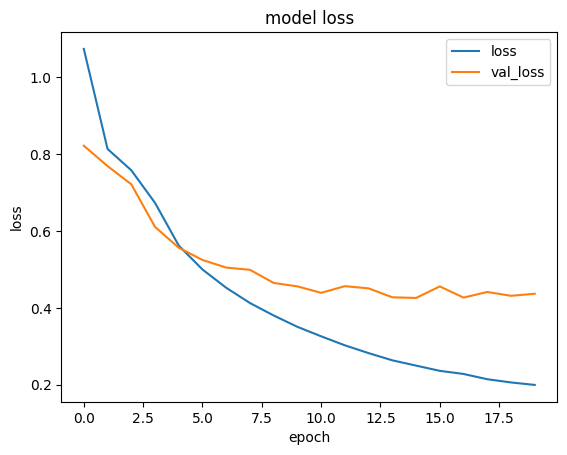

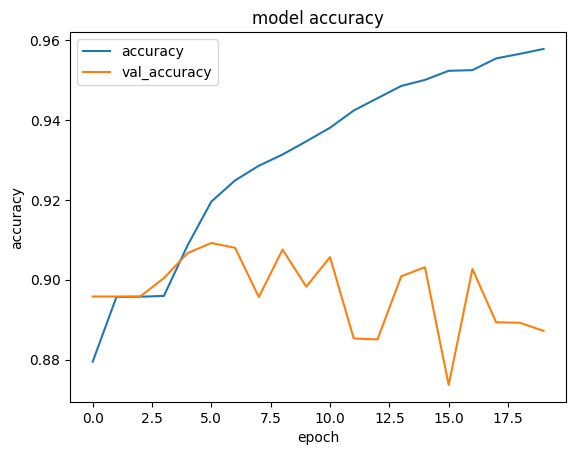

In [163]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [133]:
model.save_weights('model_weights_sentiment_81%.h5')

In [164]:
vocab_size = 20000
embedding_dim = 300
max_length = 300
trunc_type='post'
oov_tok = ""

In [172]:
def predict(text):
  #twt = [input()]
  twt = text
  #vectorizing the tweet by the pre-fitted tokenizer instance
  twt = tokenizer.texts_to_sequences(twt)
  #padding the tweet to have exactly the same shape as `embedding_2` input
  twt = pad_sequences(twt, maxlen=150, dtype='int32')
  #print(twt)

  sentiment = model.predict(twt)[0]
  return np.argmax(sentiment)
  """print(sentiment)
  if(np.argmax(sentiment) == 0):
      print("negative")
  elif (np.argmax(sentiment) == 1):
      print("neutral")
  elif (np.argmax(sentiment) == 2):
      print("positive")"""

In [166]:
text_list = ["সৃজনশীল উদ্ভাবনী স্মার্ট বাংলাদেশ গড়তে অবদান রাখবে: নসরুল হামিদ",
             "বিশ্ব মানবাধিকার দিবস আজ",
             "ওঠানামা করতে পারবে সাড়ে চার লাখ কনটেইনার, বাড়বে আমদানি-রফতানি",
             "প্রতিবেশী দেশের নবায়নযোগ্য জ্বালানির বিদ্যুতে আগ্রহ বাংলাদেশের",
             "হেমন্তের শেষে উত্তরে হিমেল হাওয়া",
             "সাড়ে ৮ ঘণ্টা পর দৌলতদিয়া-পাটুরিয়া নৌপথে ফেরি চলাচল স্বাভাবিক",
             "‘আইজ হঠাৎ ঠান্ডা বাড়িছে, দেরিত কামত বেড়াইছি’",
             "ভার্চুয়াল সম্মেলনে সরকার উৎখাতের পরিকল্পনা জঙ্গিদের!",
             "ব্যারিস্টার মইনুলের মৃত্যুতে সুপ্রিম কোর্টের বিচারকাজ অর্ধবেলা বন্ধ",
             "পুলিশকে কামড়ে পালালো হত্যা মামলার আসামি",
             "কুয়াশার কারণে মাঝনদীতে যাত্রী-যানবাহনসহ আটকা ৫ ফেরি",
             "পাগলা মসজিদের দানবাক্সে এবার পাওয়া গেলো ৬ কোটি ৩২ লাখ টাকা",
             "নিষেধাজ্ঞা আরোপের যৌক্তিক কারণ দেখছি না: ওবায়দুল কাদের",
             "৩২ বৈধ প্রার্থীর প্রার্থিতা বাতিল চেয়ে আপিল",
             "দেড় মাস পর জড়ো হতে যাচ্ছেন বিএনপির নেতাকর্মীরা",
             "শুক্রবার প্রাথমিকের সহকারী শিক্ষক নিয়োগ পরীক্ষা",
             "বিএনপি আমলের চেয়ে অর্ধেকে নেমেছে মাতৃ ও শিশু মৃত্যুহার: স্বাস্থ্যমন্ত্রী",
             "স্বাস্থ্যের সাবেক ডিজি কালামসহ ৬ জনের বিরুদ্ধে সাক্ষ্য ১৬ জানুয়ারি",
             "শিক্ষা জোর করে চাপিয়ে দেওয়া না হলেই সৃজনশীলতা তৈরি হবে: অধ্যাপক মশিউর রহমান",
             "এলসিতে বিদেশি ক্রেতার শর্ত: যা বলছে বিজিএমইএ",
             "ওয়াশিংটন ও ঢাকার সম্পর্কের জন্য শক্তিশালী শ্রম আইন গুরুত্বপূর্ণ: পিটার হাস",
             "টেস্টে আমরা উন্নতি করতে আসিনি, জিততে এসেছি: শান্ত"]

In [167]:
for tex in text_list:
  print(tex)
  predict(tex)
  print("____________________")

সৃজনশীল উদ্ভাবনী স্মার্ট বাংলাদেশ গড়তে অবদান রাখবে: নসরুল হামিদ
2/2 [==============================] - 2s 14ms/step
[0.05129059 0.07636563 0.8723438 ]
positive
____________________
বিশ্ব মানবাধিকার দিবস আজ
1/1 [==============================] - 0s 27ms/step
[0.04959809 0.07426292 0.8761389 ]
positive
____________________
ওঠানামা করতে পারবে সাড়ে চার লাখ কনটেইনার, বাড়বে আমদানি-রফতানি
2/2 [==============================] - 0s 19ms/step
[0.05059613 0.07546981 0.87393403]
positive
____________________
প্রতিবেশী দেশের নবায়নযোগ্য জ্বালানির বিদ্যুতে আগ্রহ বাংলাদেশের
2/2 [==============================] - 0s 19ms/step
[0.21435553 0.2543924  0.5312521 ]
positive
____________________
হেমন্তের শেষে উত্তরে হিমেল হাওয়া
1/1 [==============================] - 0s 22ms/step
[0.03515222 0.05528102 0.9095668 ]
positive
____________________
সাড়ে ৮ ঘণ্টা পর দৌলতদিয়া-পাটুরিয়া নৌপথে ফেরি চলাচল স্বাভাবিক
2/2 [==============================] - 0s 18ms/step
[0.05129059 0.07636563 0.8723438 ]
positive
___________

In [168]:
test_df = pd.read_csv("/content/BanglaBook/data/csv/test.csv")
test_df

,id,Book_Name,Writer_Name,Category,Rating,Review,Site,sentiment,label
0,72742,কম্পিউটার প্রোগ্রামিং ৩য় খণ্ড : ডেটা স্ট্রাকচ...,তামিম শাহরিয়ার সুবিন,প্রোগ্রামিং বেসিক বই,1,"দারুন ‍একটা বই ,প্রথমে ভেবেছিলাম Online থেকে ...",Rokomari,negative,0
1,100537,ম্যাসেজ (হার্ডকভার) আধুনিক মননে দ্বীনের ছোঁয়...,মিজানুর রহমান আজহারি,ইসলামি আদর্শ ও মতবাদ,5,সেরা বইগুলোর ভিতরে অন্যতম একটি বই মেসেজ।,Rokomari,positive,2
2,10441,মুক্তিযুদ্ধ নিয়ে স্মৃতিচারণমূলক ৫টি বই (হার্ড...,হাসান আজিজুল হক,"মুক্তিযুদ্ধের ডায়েরি, চিঠি ও স্মৃতিচারণ",5,"বইটি আমার প্রিয় ছিল খুব আগে থেকেই, টিচার্সরা...",Rokomari,positive,2
3,126428,Bandhobi,Raba Khan,English Story,1,এটির প্রচ্ছদ দ্বারা একটি বই বিচার করুন 😎,Rokomari,negative,0
4,54626,A Clash of Kings (Book 2 Of A Song Of Ice And...,George R. R. Martin,Novel: English Language,5,আমেরিকান লেখক জর্জ আর। আর মার্টিনের একটি মহাকা...,Rokomari,positive,2
...,...,...,...,...,...,...,...,...,...
31609,155057,বেলা ফুরাবার আগে,আরিফ আজাদ,আত্মশুদ্ধি ও অনুপ্রেরণা,5,Life Changing Book………. যুবকদের মাঝে আলোড়ন সৃষ্...,WafiLife,positive,2
31610,83516,মডেল টেস্ট প্যানাসিয়া (পেপারব্যাক),প্যানাসিয়া পাবলিকেশনস সম্পাদনা পর্ষদ,মানবিক বিভাগ ভর্তি প্রস্তুতি,5,অনেক ভালো,Rokomari,positive,2
31611,147993,দেবী (হার্ডকভার),হুমায়ূন আহমেদ,অতিপ্রাকৃত ও ভৌতিক উপন্যাস,5,মিসির আলির প্রথম বই। রহস্য ও লজিক গল্পের মারপ্...,Rokomari,positive,2
31612,108510,বাচ্চা ভয়ংকর কাচ্চা ভয়ংকর (হার্ডকভার),মুহম্মদ জাফর ইকবাল,শিশু-কিশোর উপন্যাস,5,"""বাচ্চা ভয়ংকর, কাচ্চা ভয়ংকর"" নামটা শুনলেই দুষ...",Rokomari,positive,2


In [171]:
sentiment = test_df['Review']
sentiment_leb = test_df['label']

In [177]:
test_df = test_df[:2000]
sentiment = test_df['Review']
sentiment_label = test_df['label']

pos_count = 0  # Initialize a counter for correct predictions

for index, text in sentiment.items():
    # Assuming `predict` is a function that returns the predicted sentiment
    smnt = predict(text)

    # Check if the predicted sentiment matches the actual label
    if smnt == sentiment_label[index]:
        pos_count += 1

# Calculate accuracy
accuracy = pos_count / len(test_df)
print(f"Accuracy: {accuracy}")


2/2 [==============================] - 0s 14ms/step
Accuracy: 0.878
